# Test PDPbox with multiclass classification problem
## Kaggle Otto Group
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [7]:
import pandas as pd
import xgboost as xgb
import numpy as np

%matplotlib inline

### read training set

In [2]:
otto_raw = pd.read_csv('otto_train.csv')

In [3]:
otto_raw.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

    ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0   ...           1        0        0        0        0        0        0   
1   ...           0        0        0        0        0        0        0   
2   ...           0        0        0        0        0        0        0   
3   ...           0        1        2        0        0        0        0   
4   ...           1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [4]:
otto_raw['target'] = otto_raw['target'].apply(lambda x : int(x.split('_')[1])-1)
otto_train = otto_raw.drop(['id', 'target'], axis=1)

## First test XGBoost
### create model

In [5]:
clf = xgb.XGBClassifier(objective='multi:softprob', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100, nthread=4)
%time clf.fit(otto_train, otto_raw['target'])

CPU times: user 1min 47s, sys: 523 ms, total: 1min 48s
Wall time: 27.2 s


XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

# start testing PDPbox

In [6]:
from pdpbox import pdp

#### since this dataset only have numeric features..
For multiclass classification problem, each class would have a corresponding plot.

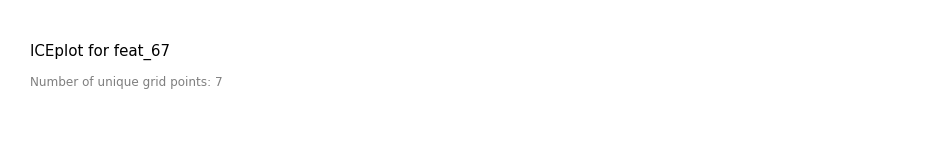

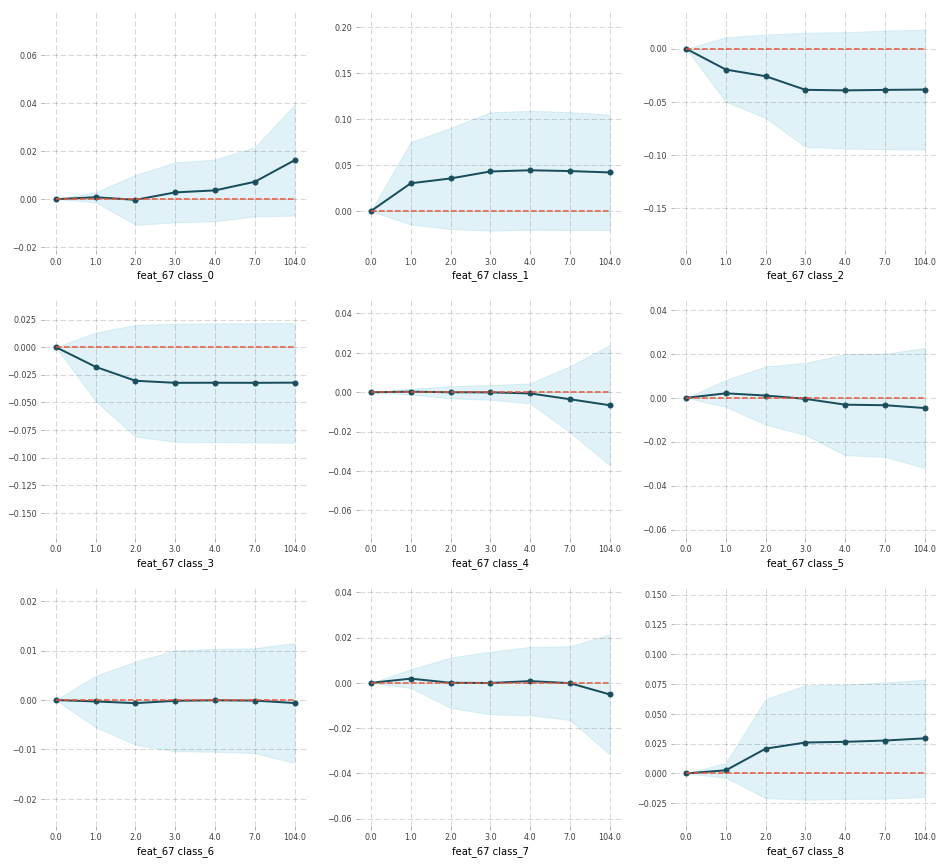

In [8]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3)

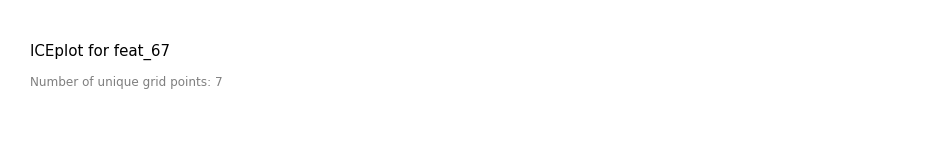

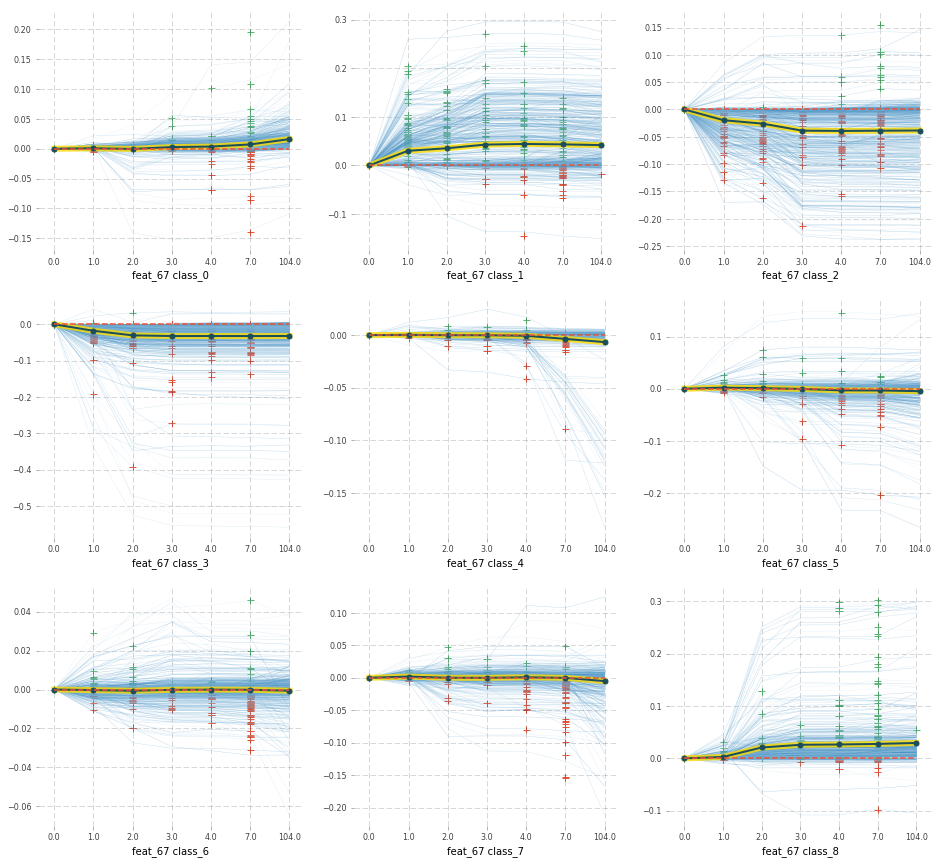

In [9]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3, plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

#### you can also set multi_flag=True, which_class=(the class you want to check)

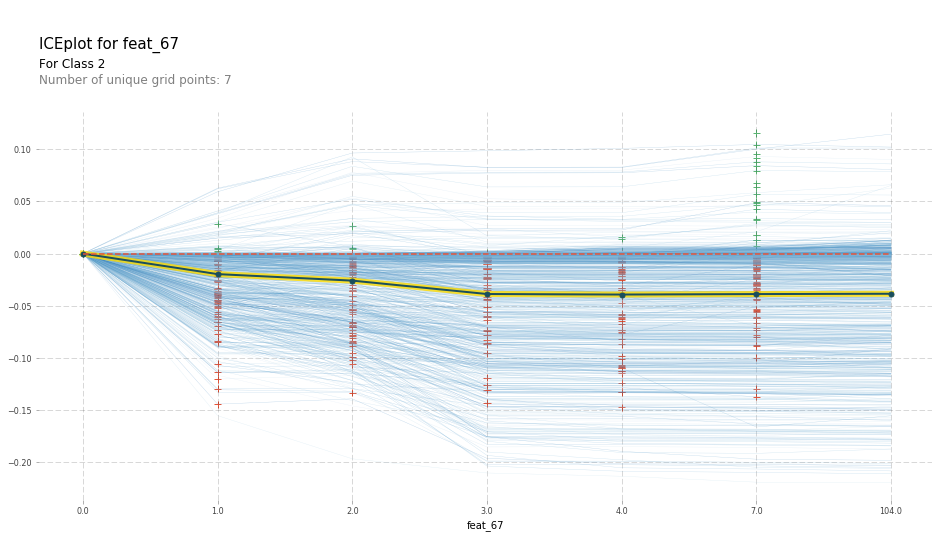

In [10]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True)

#### do clustering

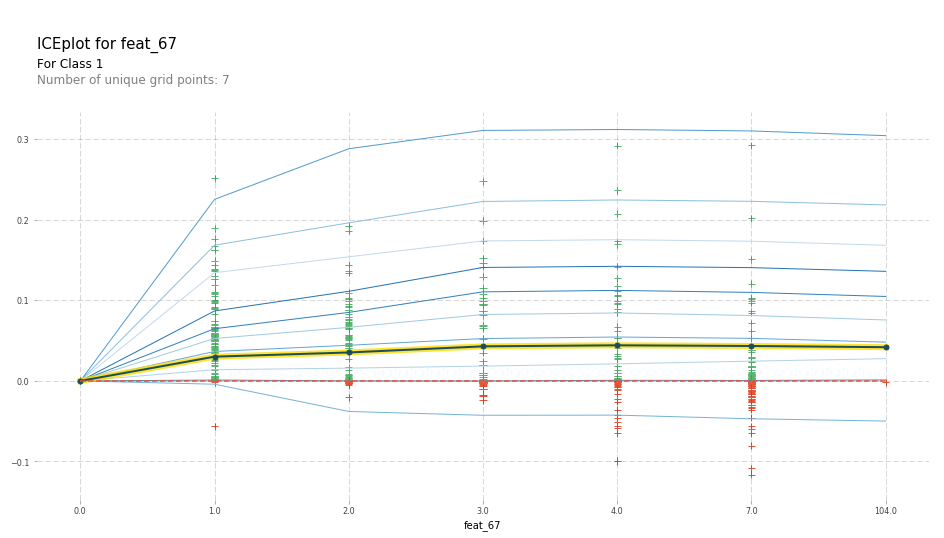

In [11]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=1, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to customize percentile range

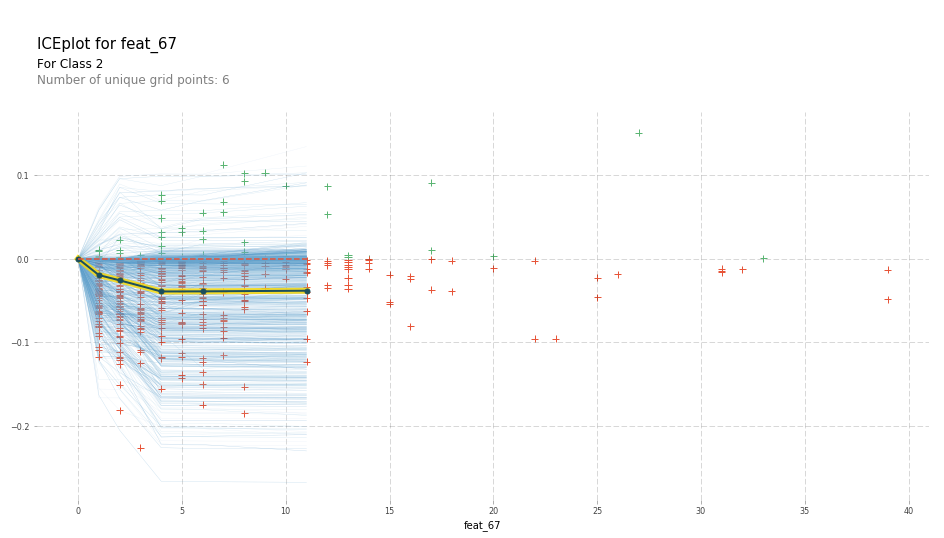

In [13]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67', percentile_range=(5, 95))
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000)

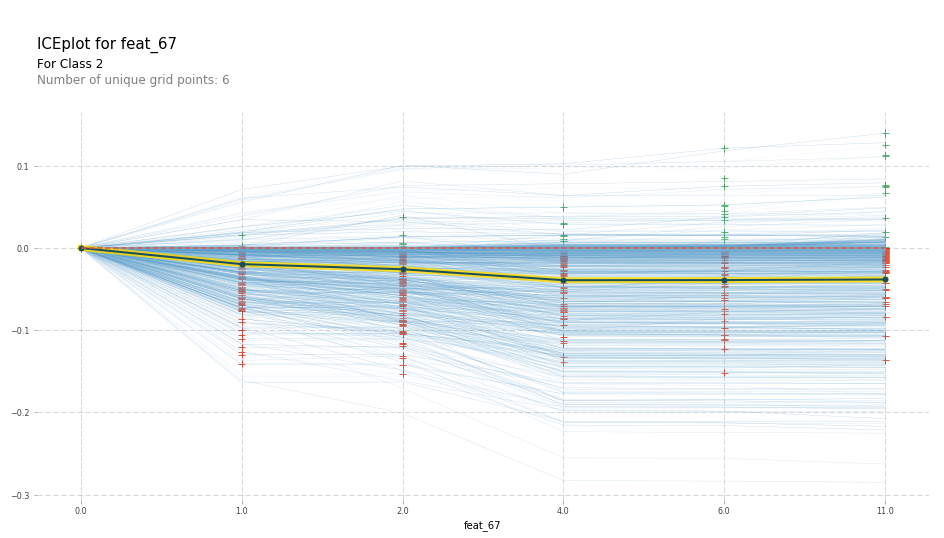

In [14]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True)

## test interaction

In [15]:
pdp_67_24 = pdp.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10])

#### only plot for class 5

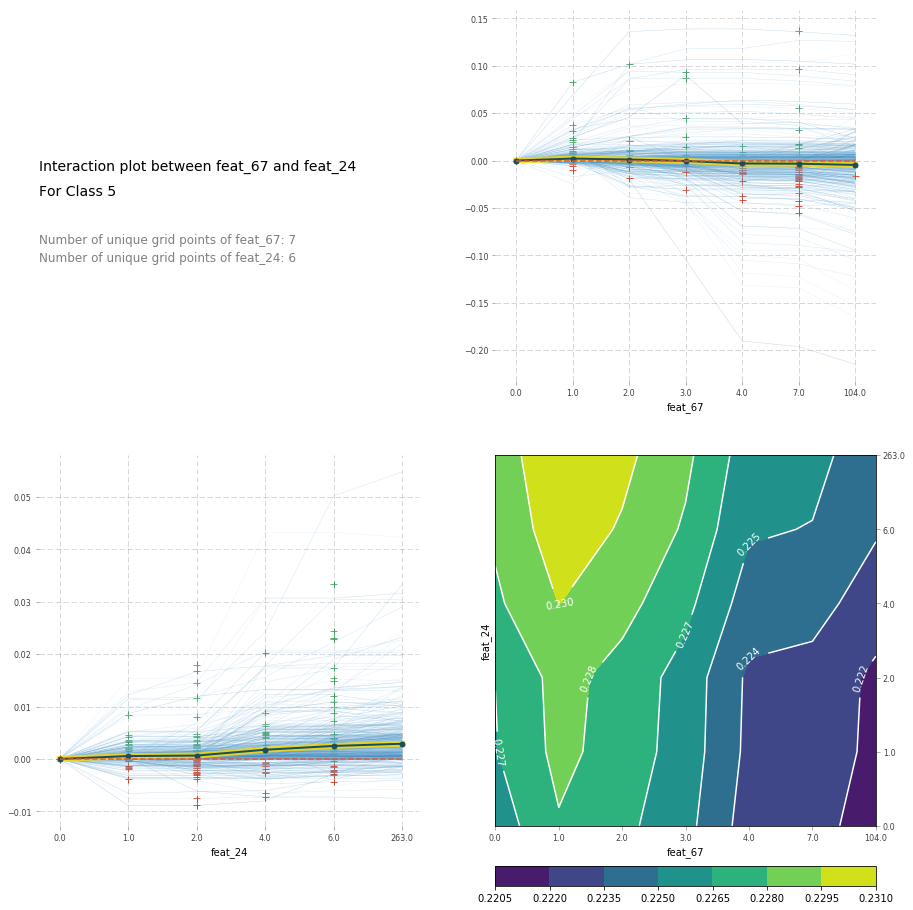

In [16]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)

#### only plot out the contour plot

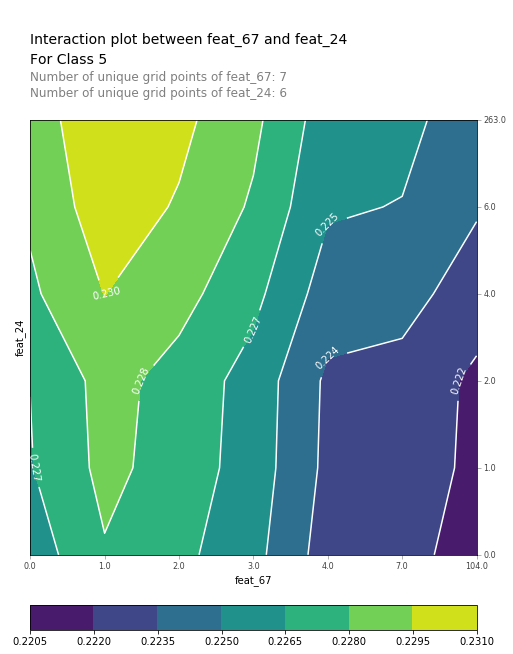

In [18]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True, only_inter=True)

#### plot out for all classes

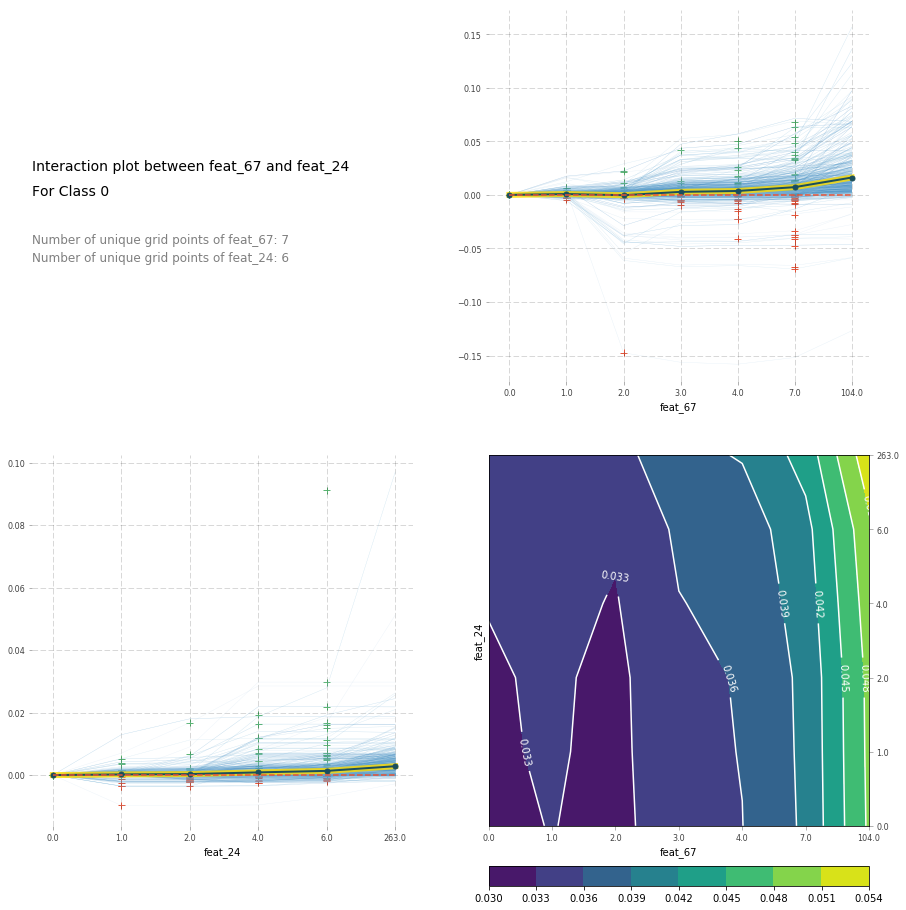

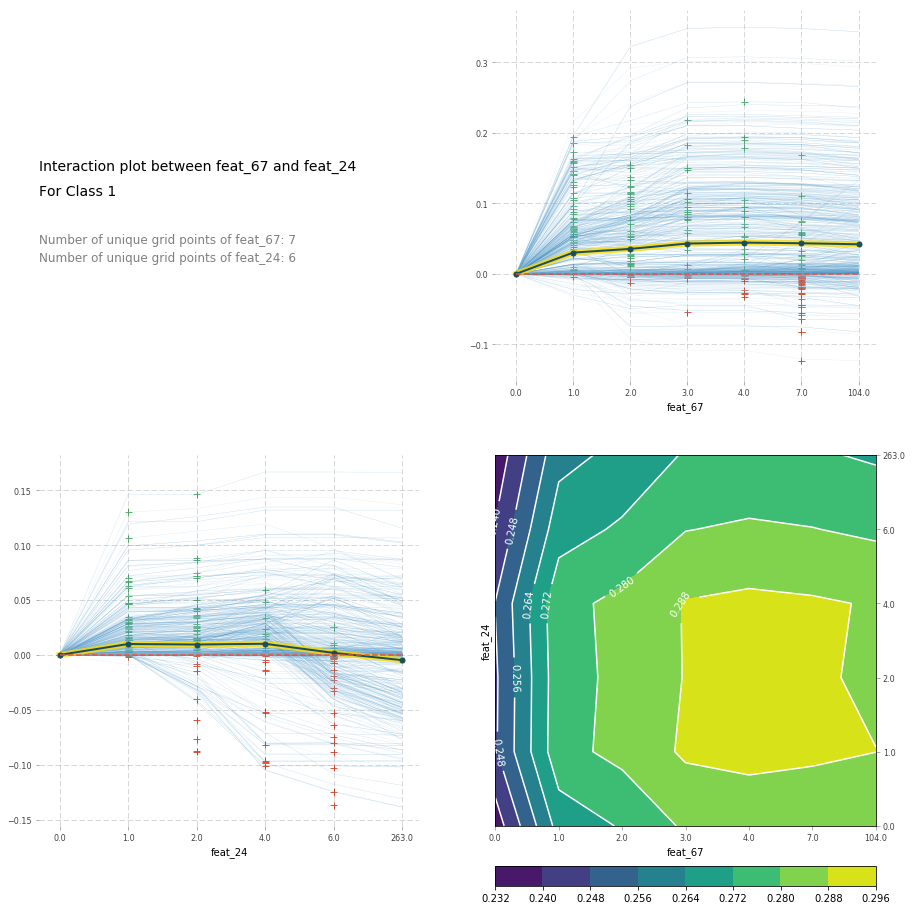

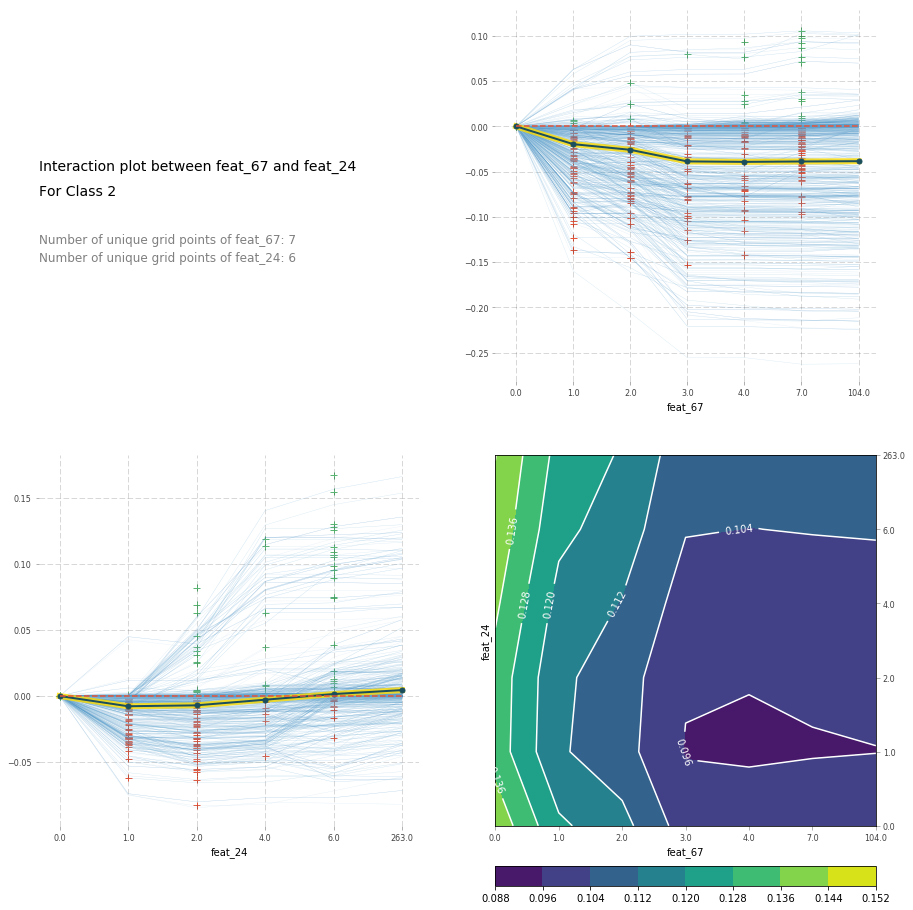

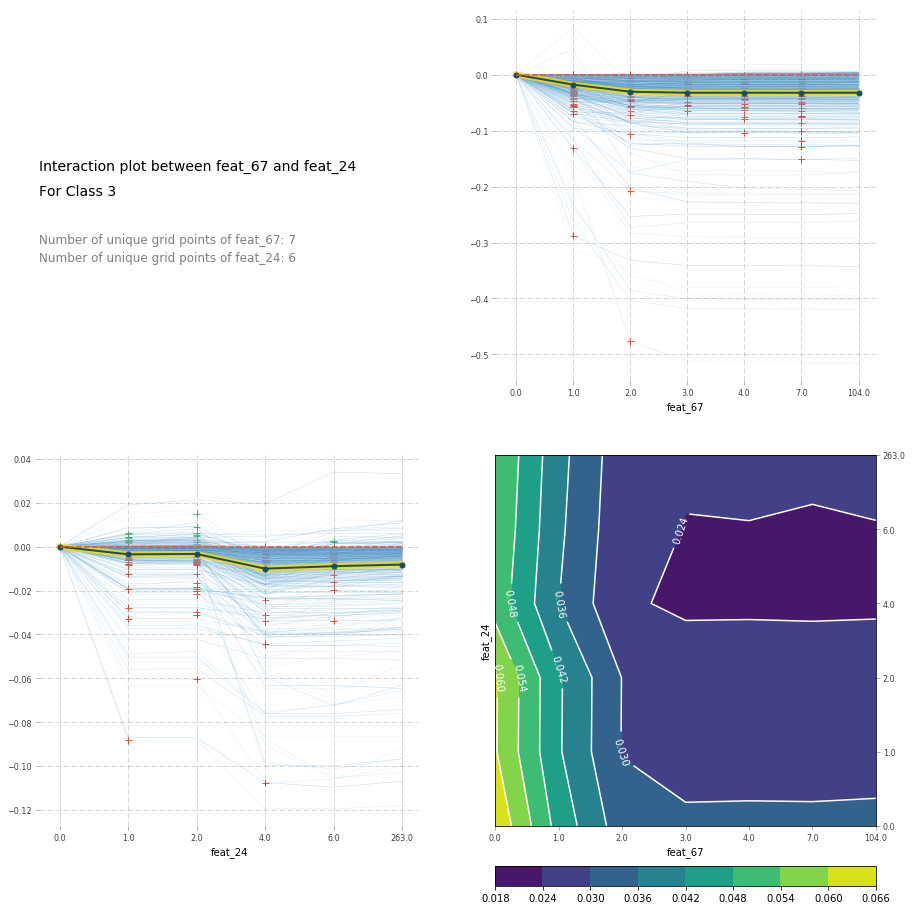

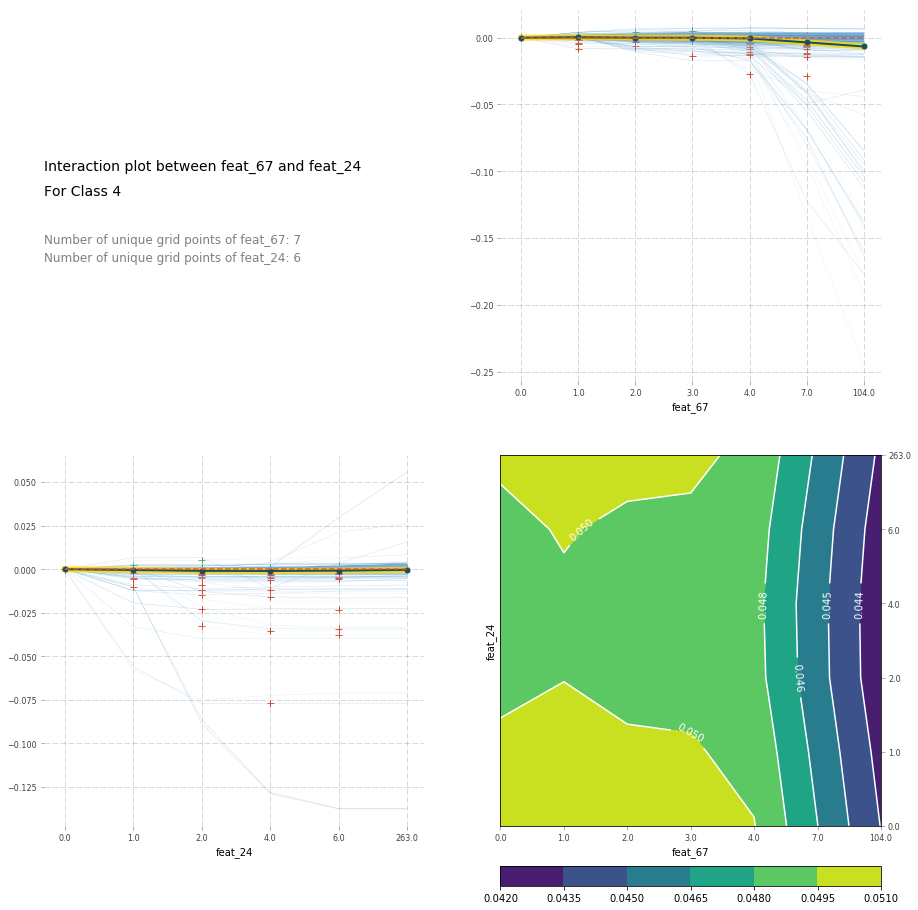

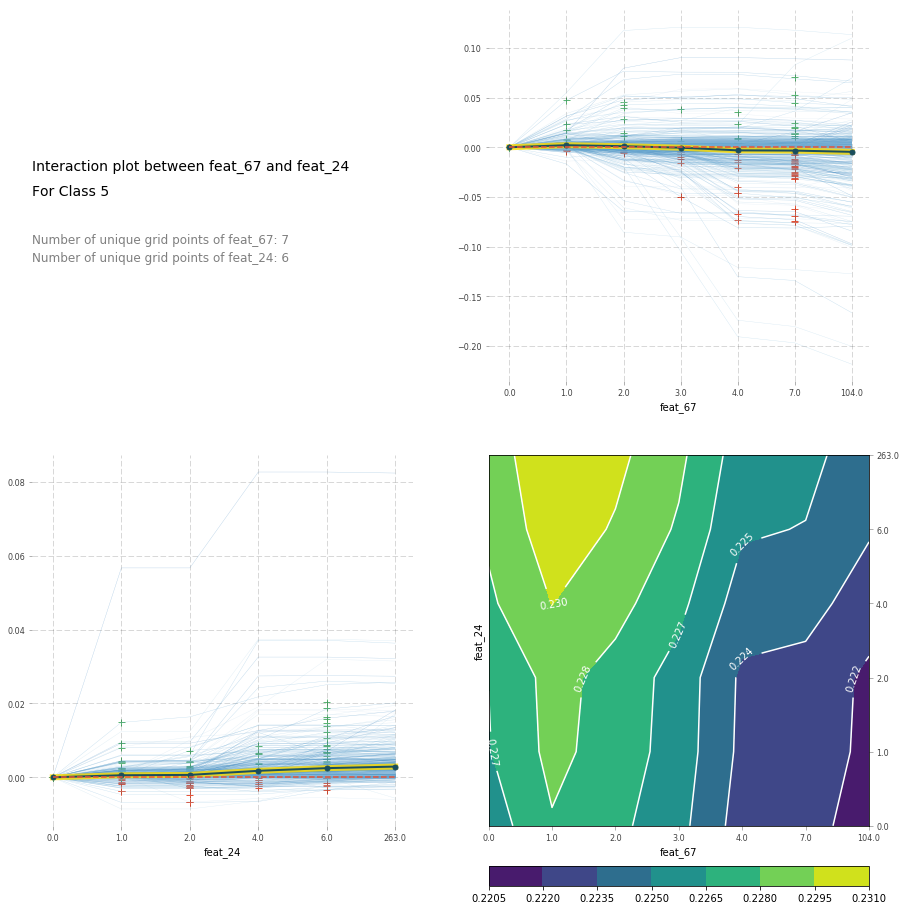

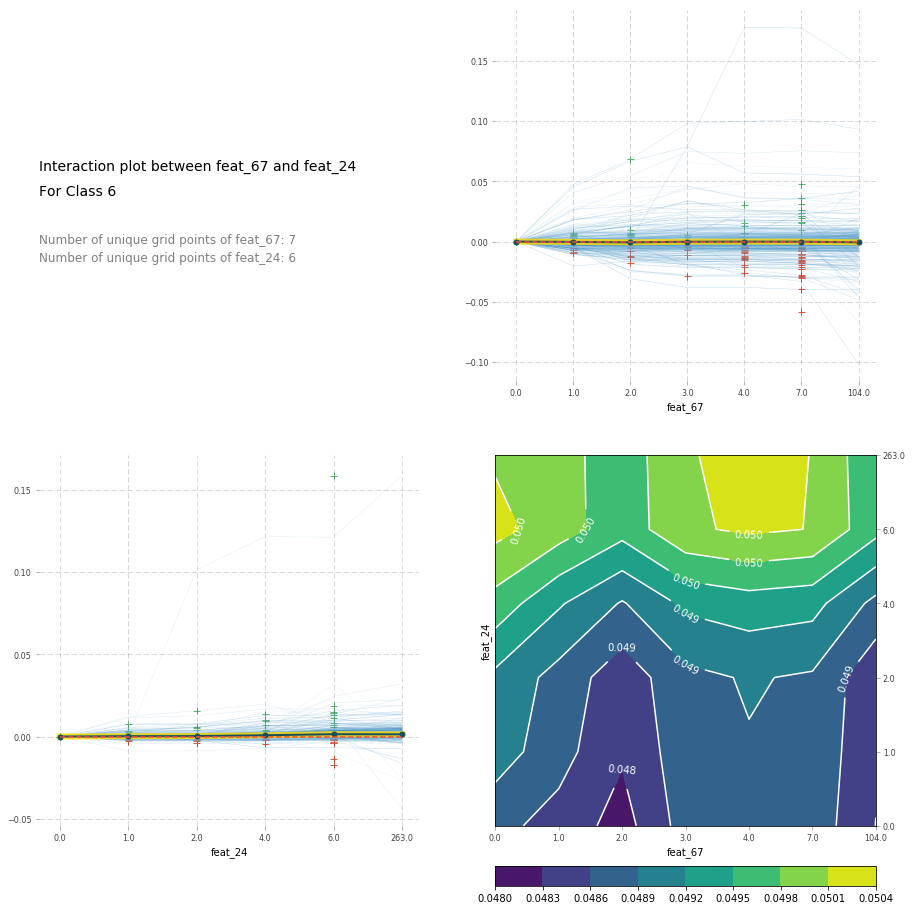

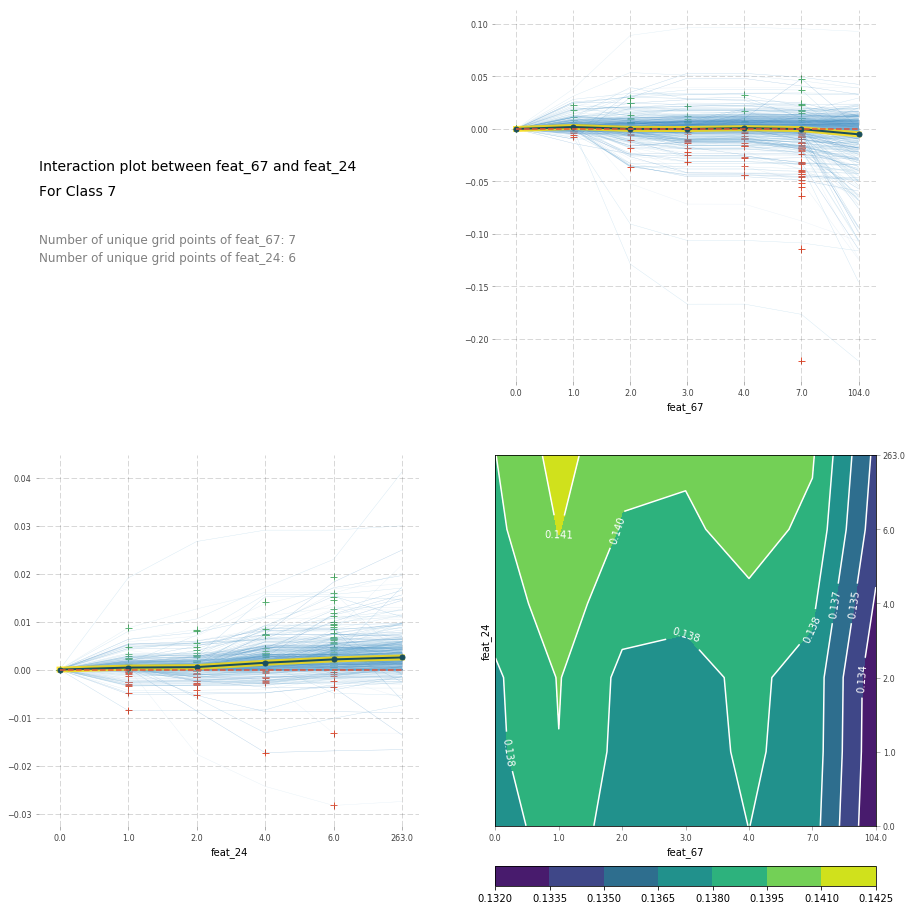

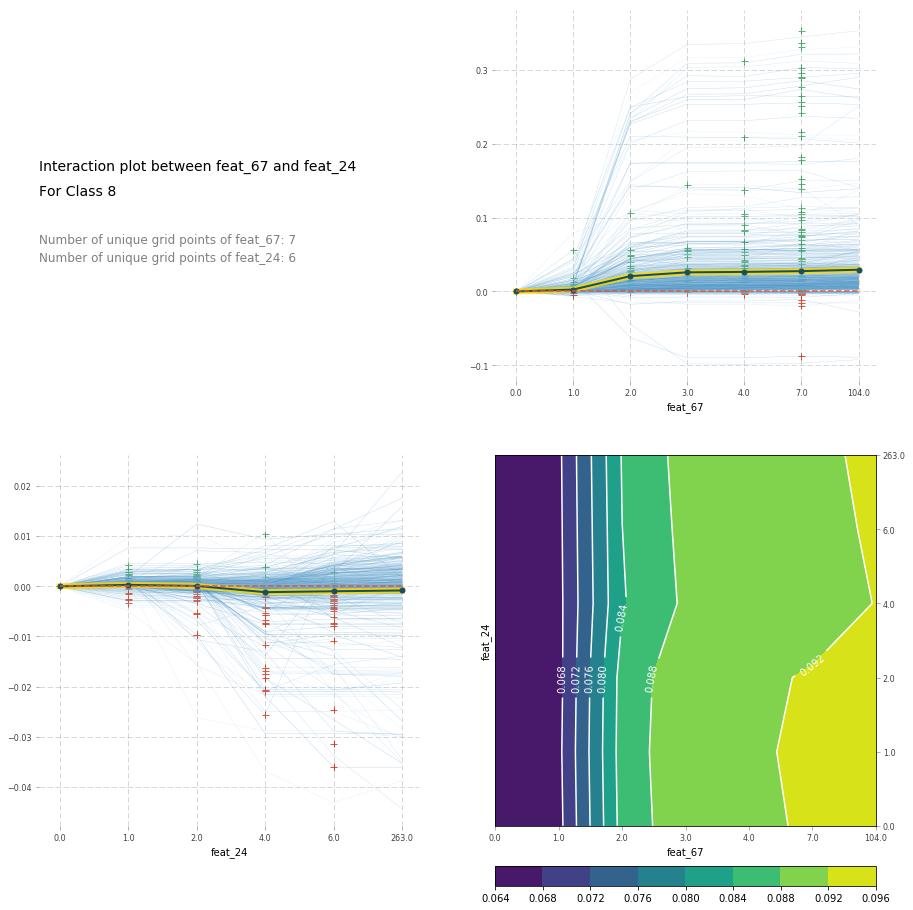

In [19]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.01, x_quantile=True)

#### only plot out contours for all classes

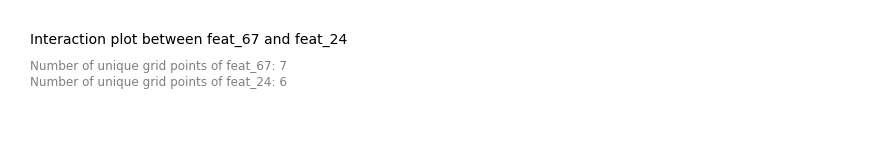

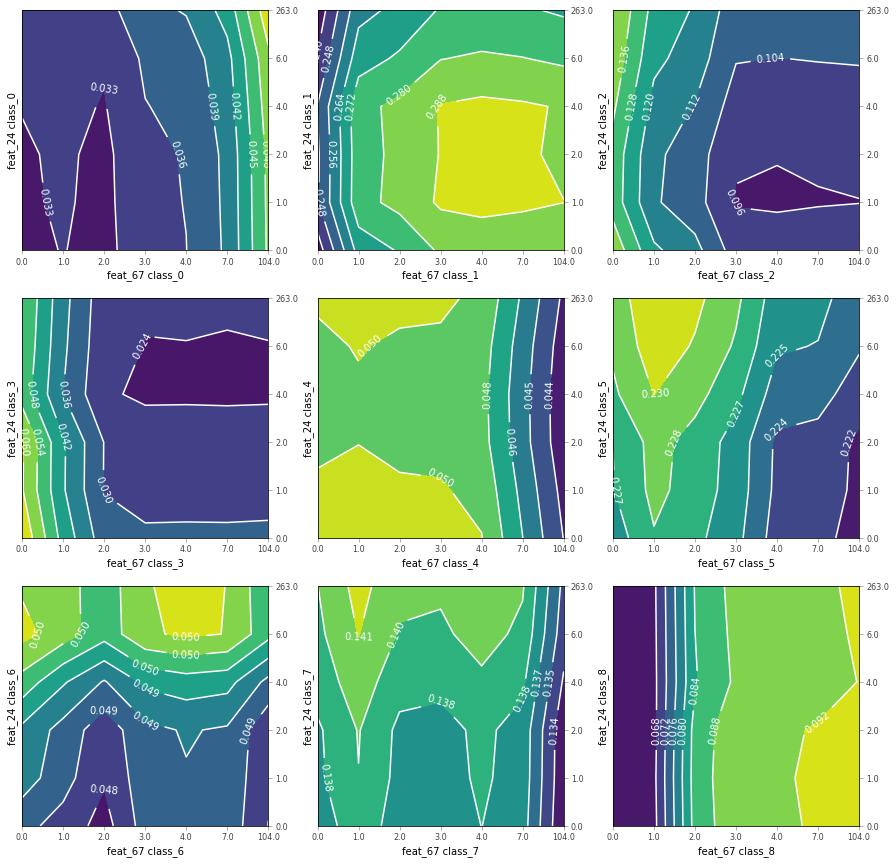

In [20]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=False, which_class=5, x_quantile=True, only_inter=True, ncols=3)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_features=50, n_jobs=4, random_state=24)
%time rf.fit(otto_train, otto_raw['target'])

CPU times: user 50.9 s, sys: 187 ms, total: 51.1 s
Wall time: 13.3 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=4, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

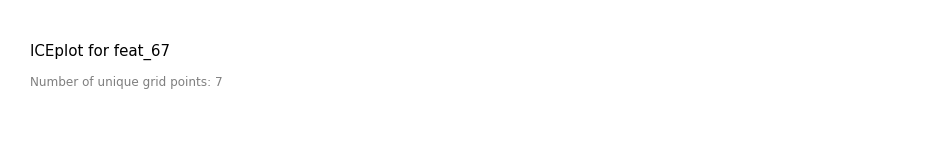

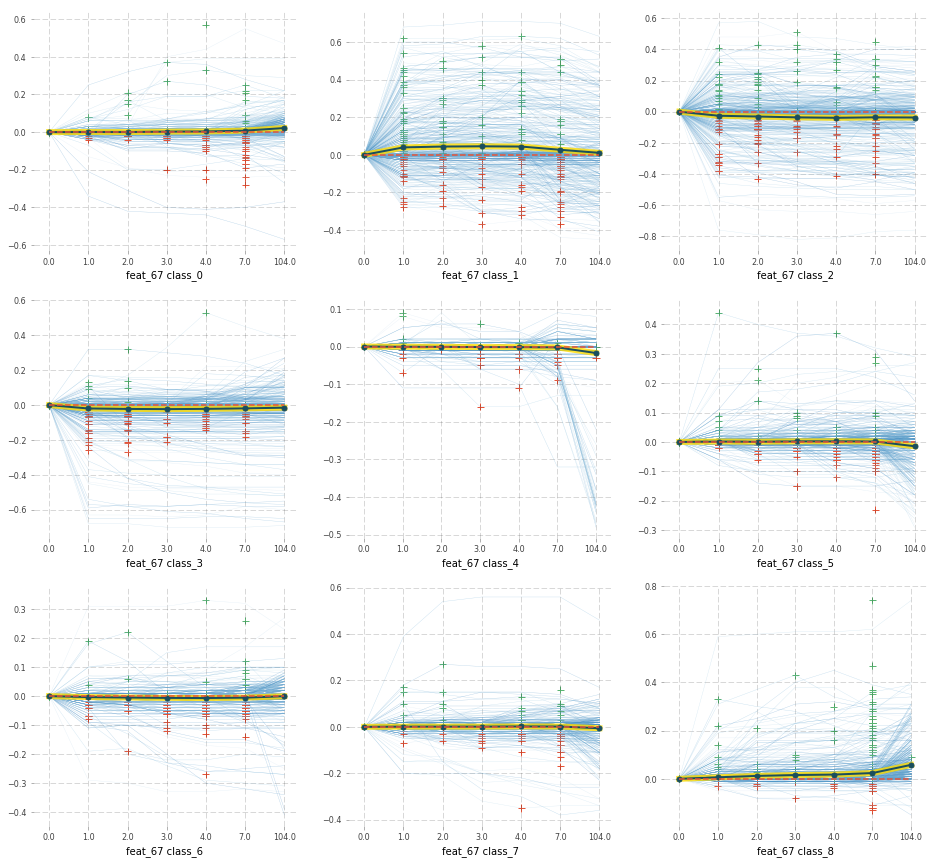

In [23]:
pdp_feat_67_rf = pdp.pdp_isolate(rf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=3, 
             plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

### interaction between feat_67 and feat_24

In [24]:
pdp_67_24_rf = pdp.pdp_interact(rf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10], 
                                percentile_ranges=[None, None])

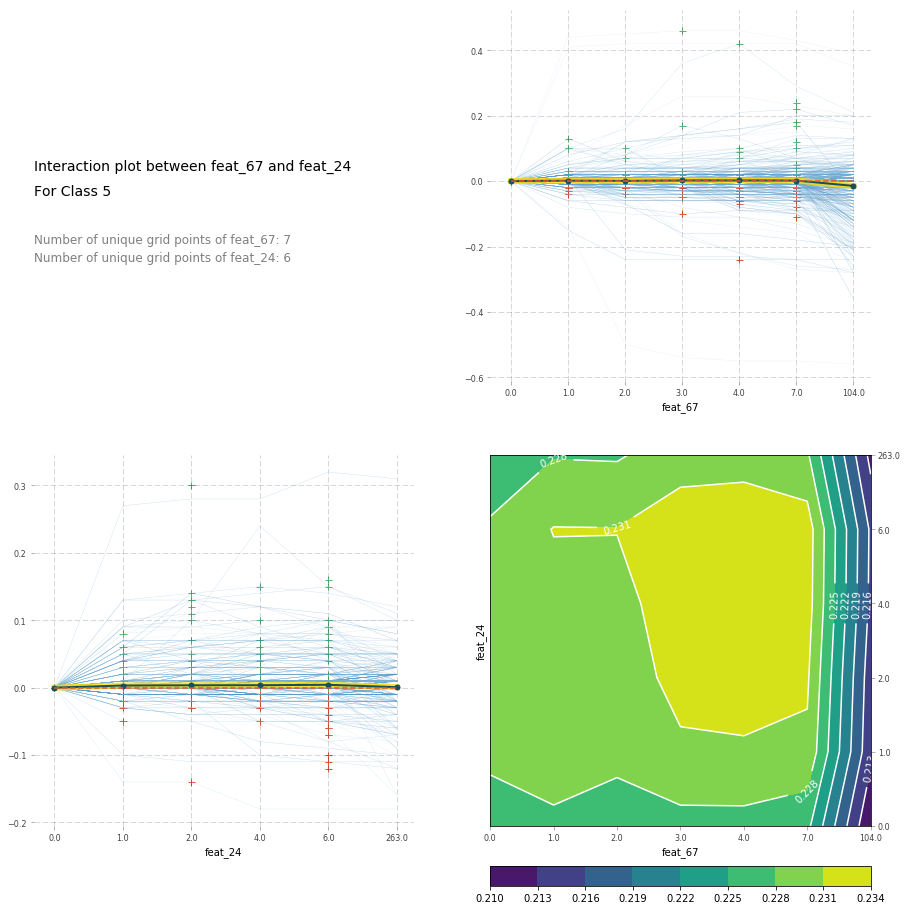

In [25]:
pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)